In [3]:
import numpy as np

def sigmoid(x):
    return 1/ (1+np.exp(-x))

N = 2000

x_data = np.random.randn(N, 3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
wxb    = np.matmul( w_real, x_data.T ) + b_real

y_data_pre_noise = sigmoid( wxb )
y_data = np.random.binomial(1, y_data_pre_noise)

Text(0.5, 0, 'y')

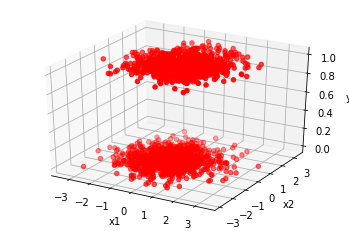

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data[:,0], x_data[:,1], y_data[:], c='r')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [20]:
import tensorflow as tf

NUM_STEPS = 60
learning_rate = 0.5

g   = tf.Graph()
wb_ = []

with g.as_default():
    x      = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([0,0,0], dtype=tf.float32, name='weights')
        b = tf.Variable( 0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul( tf.expand_dims(w,0), tf.transpose(x)) + b
    
    with tf.name_scope('loss') as scope:
        # loss = y_true * tf.log(y_pred) - (1-y_true) * tf.log(1-y_pred)
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
        loss = tf.reduce_mean( loss )
        
    with tf.name_scope('train') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        
        for step in range(NUM_STEPS+1):
            sess.run( train, {x: x_data, y_true: y_data})
            
            if( step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

0 [array([0.04161625, 0.05624589, 0.008927  ], dtype=float32), -0.019499997]
5 [array([0.18414575, 0.2514251 , 0.0427006 ], dtype=float32), -0.08648349]
10 [array([0.26044244, 0.35804954, 0.06366601], dtype=float32), -0.122384734]
15 [array([0.30328023, 0.41883063, 0.07680905], dtype=float32), -0.14245917]
20 [array([0.3281211 , 0.454487  , 0.08509739], dtype=float32), -0.15402289]
25 [array([0.34281486, 0.47577322, 0.09033378], dtype=float32), -0.1608137]
30 [array([0.3516127 , 0.4886151 , 0.09363993], dtype=float32), -0.16485193]
35 [array([0.35692006, 0.49641186, 0.09572342], dtype=float32), -0.1672734]
40 [array([0.36013693, 0.5011638 , 0.09703317], dtype=float32), -0.16873373]
45 [array([0.36209258, 0.5040666 , 0.09785441], dtype=float32), -0.16961792]
50 [array([0.3632838 , 0.5058424 , 0.09836803], dtype=float32), -0.17015484]
55 [array([0.36401042, 0.50692964, 0.09868851], dtype=float32), -0.17048158]
60 [array([0.36445397, 0.50759566, 0.09888804], dtype=float32), -0.17068073]
